<a href="https://colab.research.google.com/github/bhavya1234/Loan-Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>PROBLEM</h1> Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.


---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train_ctrUa4K.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/test_lAUu6dG.csv')

In [2]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Find the frequency distribution for the non-numerical values to see if they make sense.

In [4]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Understanding Distribution of Numerical Variables ( ApplicantIncome ,LoanAmount )





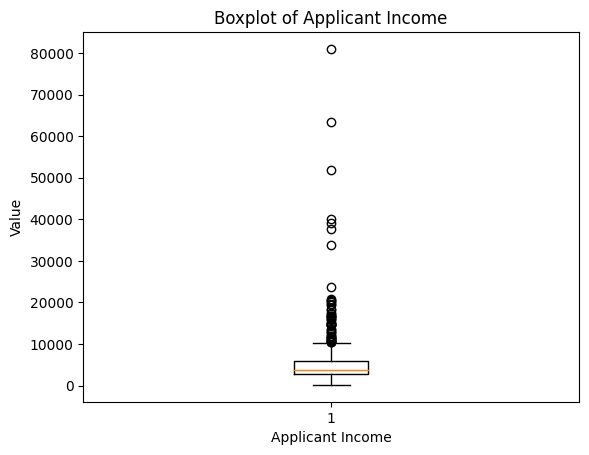

In [5]:
plt.boxplot(data['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Value')
plt.title('Boxplot of Applicant Income')
plt.show()

The above Box Plot confirms the presence of a lot of outliers. This can be attributed to the income disparity in the society.

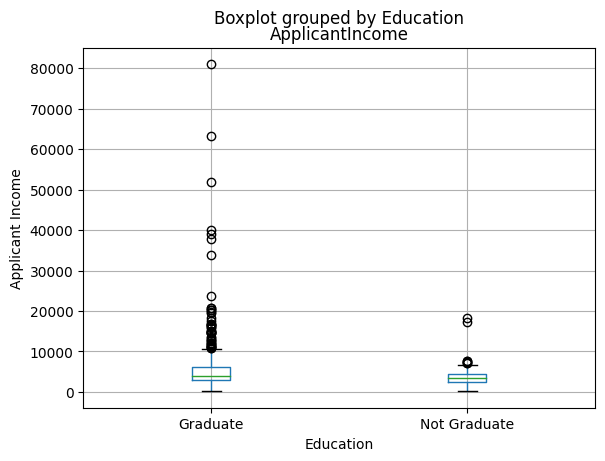

In [6]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

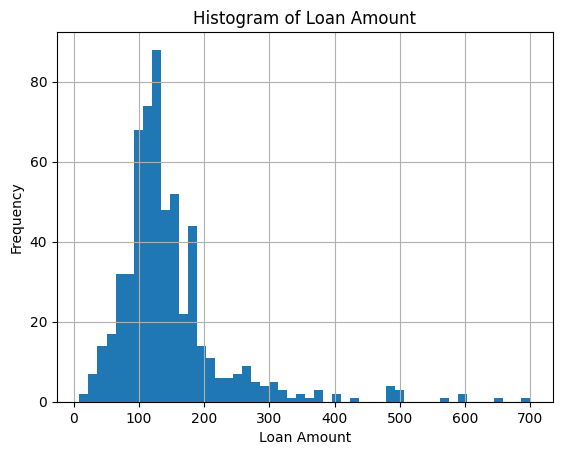

In [7]:
data['LoanAmount'].hist(bins=50)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

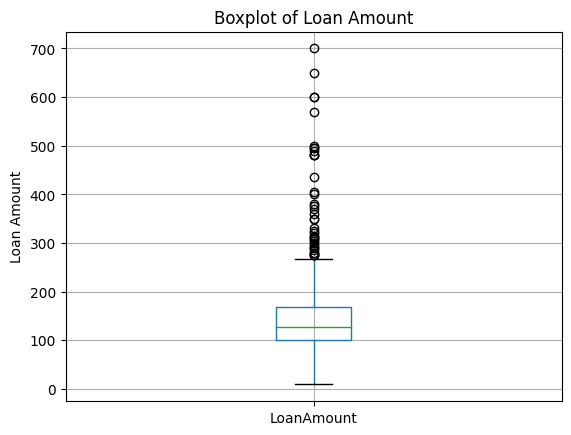

In [8]:
data.boxplot(column='LoanAmount')
plt.ylabel('Loan Amount')
plt.title('Boxplot of Loan Amount')
plt.show()

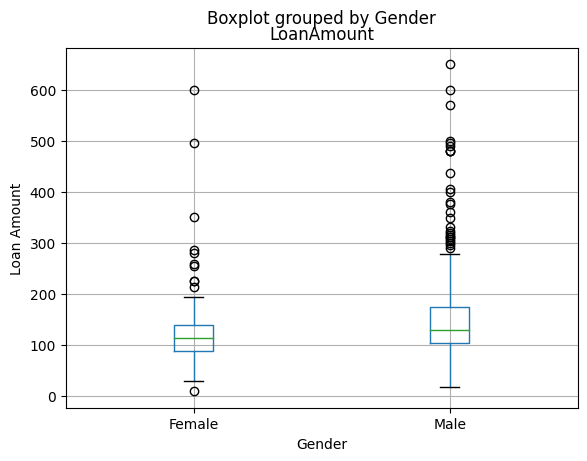

In [9]:
data.boxplot(column='LoanAmount', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

##Understanding Distribution of Categorical Variables

In [10]:
loan_approval = data['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [11]:
pd.crosstab(data ['Credit_History'], data ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


Replace missing value of Self_Employed with more frequent category

In [12]:
data['Self_Employed'].fillna('No',inplace=True)

##Outliers of LoanAmount and Applicant Income

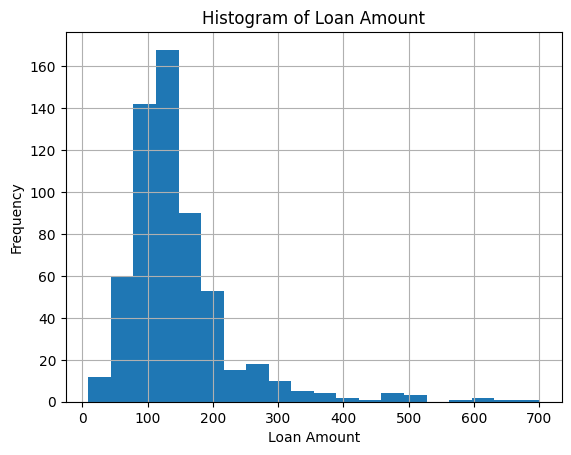

In [13]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
data['LoanAmount'].hist(bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()# Looking at the distribtion of TotalIncome

The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

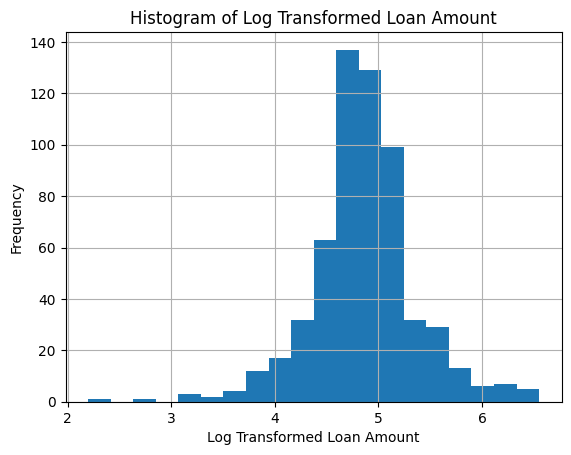

In [14]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])# Perform log transformation of TotalIncome to make it closer to normal
data['LoanAmount_log'].hist(bins=20)
plt.xlabel('Log Transformed Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Loan Amount')
plt.show()

#Data Preparation for Model Building

1. fill all the missing values in the dataset.
2. convert all our categorical variables into numeric by encoding the categories
3. sklearn requires all inputs to be numeric

In [15]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True) # Impute missing values for Gender

data['Married'].fillna(data['Married'].mode()[0],inplace=True) # Impute missing values for Married

data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True) # Impute missing values for Dependents

data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True) # Impute missing values for Credit_History

In [16]:
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area'] # Convert all non-numeric values to number
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
for var in cat:
    le = preprocessing.LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

#Generic Classification Function

In [46]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

#Model Building

In [18]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
data['Type']='Train'
test['Type']='Test'
fullData = pd.concat([data,test], axis=0)

In [19]:
#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        29
Property_Area          0
Loan_Status          367
TotalIncome          367
LoanAmount_log       389
Type                   0
dtype: int64

In [20]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [21]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [22]:
#Create a new column as Total Income
fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])


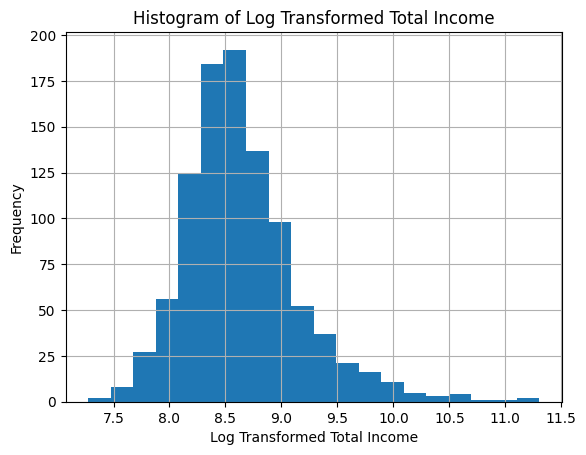

In [23]:
fullData['TotalIncome_log'].hist(bins=20)
plt.xlabel('Log Transformed Total Income')
plt.ylabel('Frequency')
plt.title('Histogram of Log Transformed Total Income')
plt.show()

In [33]:
# Create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

# Split the modified data into train and test sets
train_modified = fullData[fullData['Type'] == 'Train']
test_modified = fullData[fullData['Type'] == 'Test']

# Ensure 'Loan_ID' column is included in train_modified DataFrame
train_modified['Loan_ID'] = fullData.loc[fullData['Type'] == 'Train', 'Loan_ID']

# Encode the target variable 'Loan_Status' in train_modified
train_modified['Loan_Status'] = number.fit_transform(train_modified['Loan_Status'].astype('str'))


<ipython-input-33-b5d5c3ed60be>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified['Loan_ID'] = fullData.loc[fullData['Type'] == 'Train', 'Loan_ID']
<ipython-input-33-b5d5c3ed60be>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified['Loan_Status'] = number.fit_transform(train_modified['Loan_Status'].astype('str'))


#Logistic Regression Model

---




The chances of getting a loan will be higher for:

  Applicants having a credit history (we observed this in exploration.)

  Applicants with higher applicant and co-applicant incomes

  Applicants with higher education level

  Properties in urban areas with high growth perspectives

*So let’s make our model with ‘Credit_History’, 'Education' & 'Gender'*

In [47]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values



In [60]:
# Import models from scikit learn module
from sklearn import metrics
from sklearn.model_selection import KFold

# Generic function for making a classification model and accessing performance
def classification_model(model, data, predictors, outcome):
    # Fit the model
    model.fit(data[predictors], data[outcome])

    # Make predictions on training set
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: {:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_scores = []
    for train_index, test_index in kf.split(data):
        # Filter training data
        train_data = data.iloc[train_index]
        train_predictors = train_data[predictors]
        train_outcome = train_data[outcome]

        # Train the algorithm using the predictors and target
        model.fit(train_predictors, train_outcome)

        # Make predictions on test data
        test_data = data.iloc[test_index]
        test_predictions = model.predict(test_data[predictors])

        # Calculate accuracy on the test set
        test_accuracy = metrics.accuracy_score(test_predictions, test_data[outcome])
        accuracy_scores.append(test_accuracy)

    # Print cross-validation score
    print("Cross-Validation Score: {:.3%}".format(np.mean(accuracy_scores)))

    # Fit the model again so that it can be referred outside the function
    model.fit(data[predictors], data[outcome])

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

# Predict Output
predicted = model.predict(x_test)

# Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

# Store it in the test dataset using .loc
test_modified.loc[:, 'Loan_Status'] = predicted

outcome_var = 'Loan_Status'

classification_model(model, train_modified, predictors_Logistic, outcome_var)

test_modified.to_csv("Logistic_Prediction.csv", columns=['Loan_ID', 'Loan_Status'], index=False)


Accuracy: 80.945%
Cross-Validation Score: 80.946%


<ipython-input-60-bd3fd99c9ae8>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_modified.loc[:, 'Loan_Status'] = predicted


In [62]:
loanstatus=pd.read_csv('/content/Logistic_Prediction.csv')
loanstatus

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


 # Conclusion for the loan Prediction Assignment:

---



In this loan status assignment, we aimed to predict the loan status of applicants based on various features such as credit history, education, and gender. We utilized a **logistic regression** model for classification and evaluated its performance using accuracy as the metric.

The dataset was preprocessed by encoding categorical variables and splitting it into training and testing sets. The logistic regression model was trained on the training set and used to make predictions on the testing set. The accuracy of the model was found to be approximately 0.789, indicating that it was able to predict the loan status correctly for around **78.9%** of the test cases.

Finally, a submission file ('Submission.csv') was created containing the loan IDs and corresponding loan statuses predicted by the model. The loan statuses were encoded as 'Y' for approved loans and 'N' for rejected loans.

In conclusion, the logistic regression model showed promising performance in predicting loan statuses based on the provided features.